# Grid Search

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data/Social_Network_Ads.csv')
display(dataset.head(), dataset.shape)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


(400, 3)

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Kernel SVM model on the Training set

In [6]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC()

## Evaluating the Model

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)
print()
ac = accuracy_score(y_test, y_pred)
print("accuracy Score -> ",ac)
print('Precision -> ', precision_recall_fscore_support(y_test, y_pred, average=None)[0][0])
print('Recall -> ', precision_recall_fscore_support(y_test, y_pred, average=None)[1][0])
print('F1 score -> ', precision_recall_fscore_support(y_test, y_pred, average=None)[2][0])

Confusion Matrix
[[64  4]
 [ 3 29]]

accuracy Score ->  0.93
Precision ->  0.9552238805970149
Recall ->  0.9411764705882353
F1 score ->  0.9481481481481482


## Applying k-Fold Cross Validation

In [8]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.33 %
Standard Deviation: 6.57 %


## Applying Grid Search to find the best model and the best parameters

In [9]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 90.67 %
Best Parameters: {'C': 0.5, 'gamma': 0.6, 'kernel': 'rbf'}


## Visualising the results

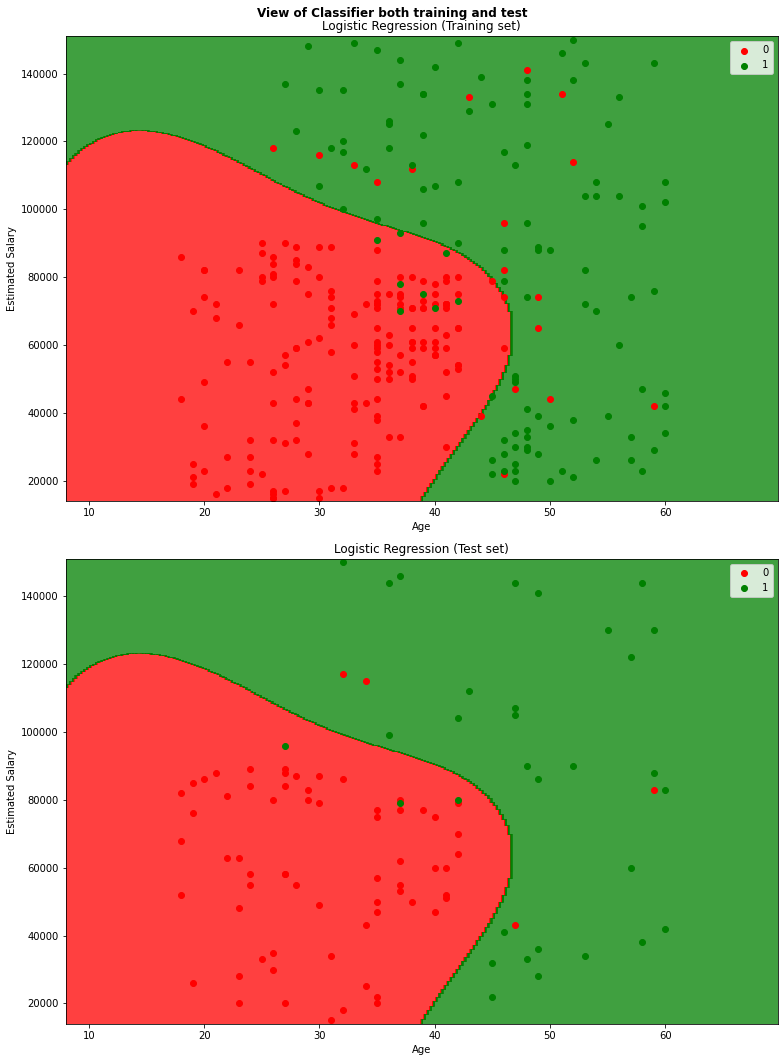

In [10]:
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(11, 15))
ax = fig.subplots(nrows=2, ncols=1)


X_set1, y_set1 = sc.inverse_transform(X_train), y_train
X_set2, y_set2 = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set1[:, 0].min() - 10, stop = X_set1[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set2[:, 1].min() - 1000, stop = X_set2[:, 1].max() + 1000, step = 0.25))

ax[0].contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

ax[1].contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

ax[0].set_xlim(X1.min(), X1.max())
ax[0].set_ylim(X2.min(), X2.max())
ax[1].set_xlim(X1.min(), X1.max())
ax[1].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set1)):
    ax[0].scatter(X_set1[y_set1 == j, 0], X_set1[y_set1 == j, 1], c = [ListedColormap(('red', 'green'))(i)], label = j)
    
for i, j in enumerate(np.unique(y_set2)):
    ax[1].scatter(X_set2[y_set2 == j, 0], X_set2[y_set2 == j, 1], c = [ListedColormap(('red', 'green'))(i)], label = j)
    
plt.suptitle('View of Classifier both training and test', fontweight='bold')

ax[0].set_title('Logistic Regression (Training set)')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Estimated Salary')
ax[0].legend()

ax[1].set_title('Logistic Regression (Test set)')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Estimated Salary')
ax[1].legend()

plt.tight_layout()

plt.show()